In [129]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
df = pd.read_csv("dataset.csv")

## EDA (exploratory data analysis)

In [131]:
df.sample(5)

,Name,NetWorth,Country,Source,Rank,Age,Industry
2522,Zhou Yifeng & family,$1.2 B,China,liquefied petroleum gas,2378,42.0,Energy
892,Francesco Gaetano Caltagirone,$3.4 B,Italy,"cement, diversified",891,78.0,Construction & Engineering
157,Kim Jung-ju,$13.3 B,South Korea,online games,158,53.0,Technology
1892,Narendrakumar Parekh,$1.7 B,India,adhesives,1833,82.0,Manufacturing
1571,Sandro Veronesi & family,$2.1 B,Italy,fashion,1517,61.0,Fashion & Retail


In [132]:
df.describe()

,Rank,Age
count,2755.000000,2676.000000
mean,1345.663521,63.113602
std,772.669811,13.445153
min,1.000000,18.000000
25%,680.000000,54.000000
50%,1362.000000,63.000000
75%,2035.000000,73.000000
max,2674.000000,99.000000


In [133]:
df.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

In [134]:
df = df.dropna()

## Data Visualization

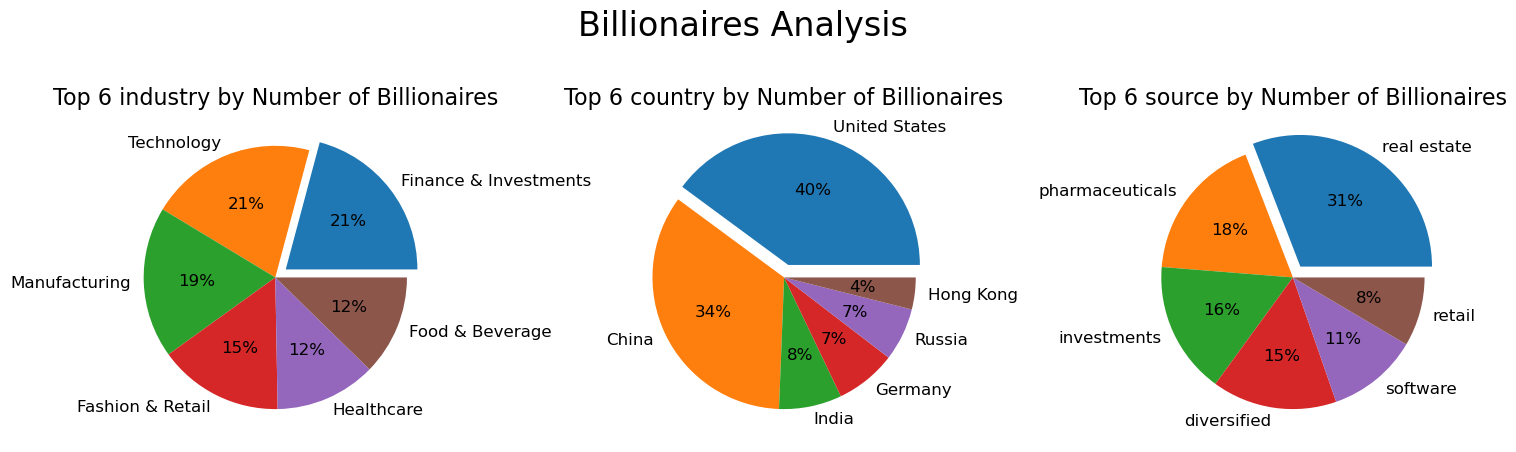

In [135]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
columns = ["Industry", "Country", "Source"]


for i, col in enumerate(columns):
    values = data[col].value_counts().head(6)  
    explode = [0.1 if j == values.idxmax() else 0 for j in values.index]  
    axes[i].pie(values, labels=values.index, autopct='%1.f%%', explode=explode)  
    axes[i].set_title(f"Top 6 {col.lower()} by Number of Billionaires", fontsize=16)

plt.suptitle("Billionaires Analysis", fontsize=24) 
plt.tight_layout()  

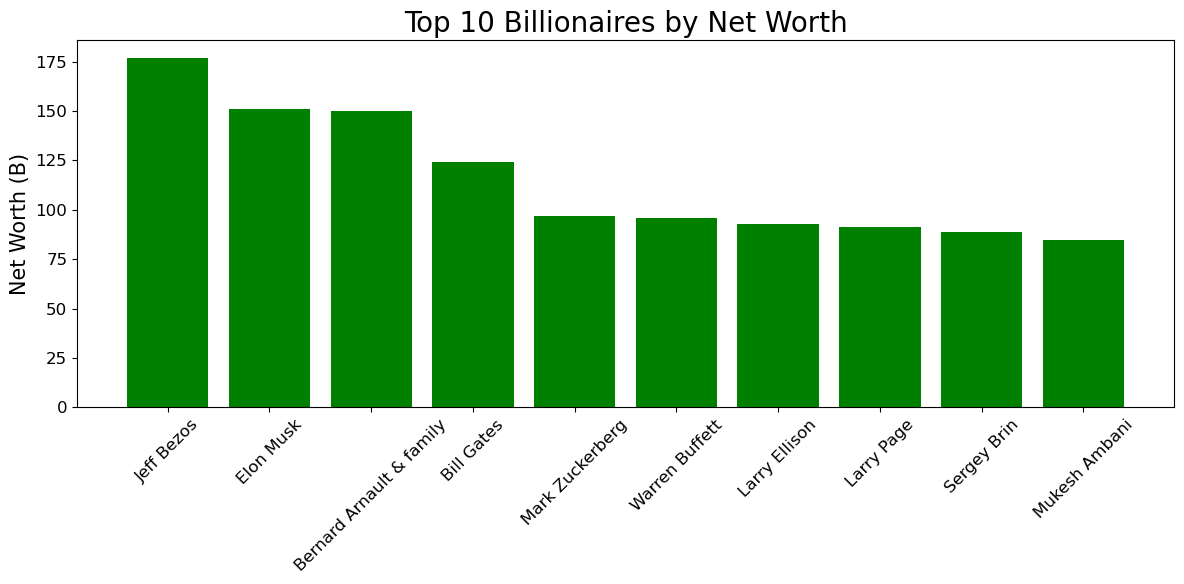

In [152]:
top_n = data.nlargest(10, 'NetWorth')[['Name', 'NetWorth']]

plt.figure(figsize=(12, 6))
plt.bar(top_n['Name'], top_n['NetWorth'], color='green')
plt.title("Top 10 Billionaires by Net Worth", fontsize=20)
plt.ylabel("Net Worth (B)", fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()

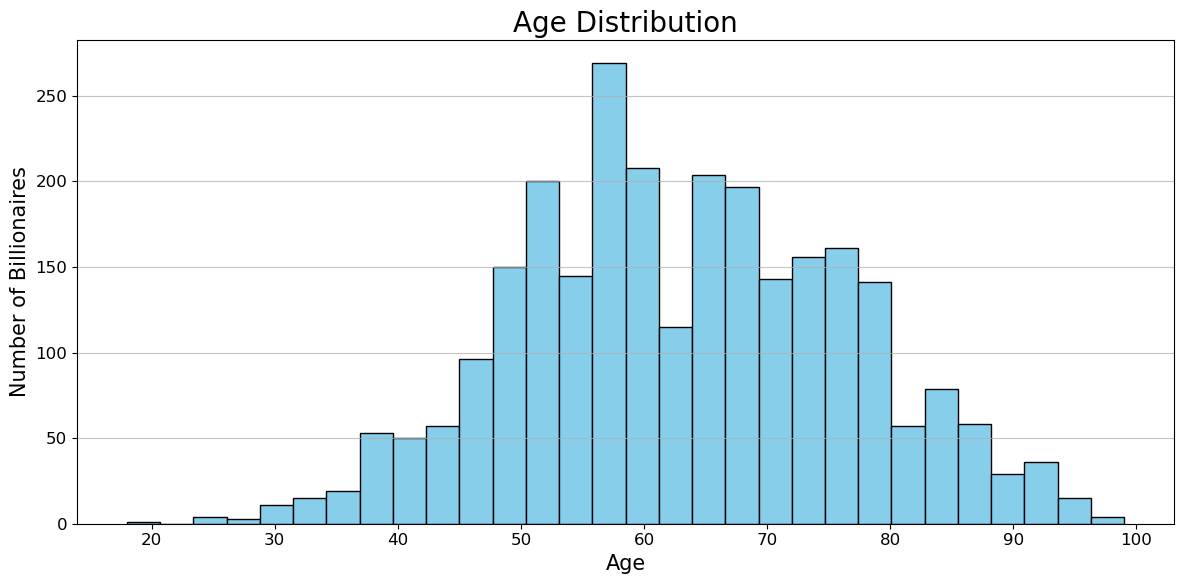

In [137]:

plt.figure(figsize=(12, 6))
plt.hist(data['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title("Age Distribution", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Number of Billionaires", fontsize=15)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

MAE: 10.53753275176316


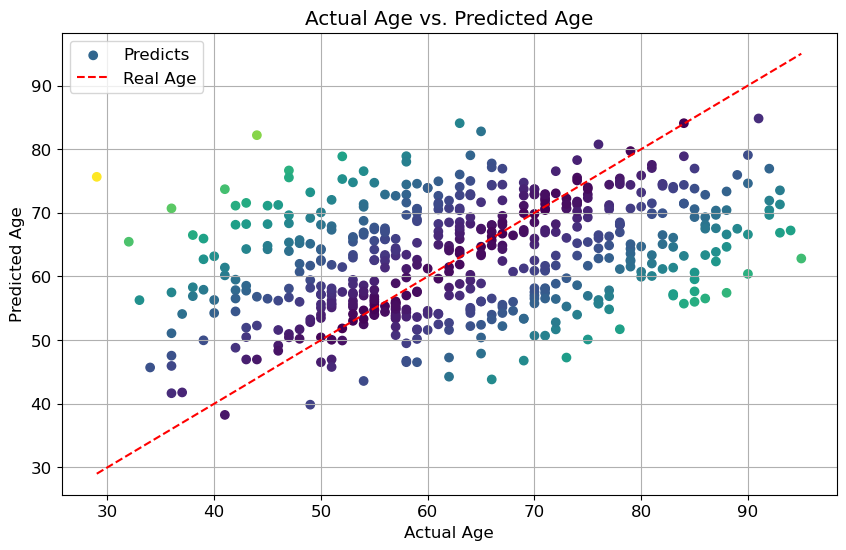

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
df['NetWorth'] = df['NetWorth'].replace({'\$': '', 'B': '', ',': ''}, regex=True).astype(float)

X = df[['NetWorth', 'Country', 'Industry']]
X = pd.get_dummies(X, drop_first=True)

y = df['Age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_age = RandomForestRegressor(n_estimators=40, random_state=42)
model_age.fit(X_train, y_train)

y_pred_age = model_age.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_age)
print("MAE:", mae)

plt.figure(figsize=(10, 6))

errors = np.abs(y_test - y_pred_age)
colors = plt.cm.viridis(errors / errors.max()) 

plt.scatter(y_test, y_pred_age, c=colors, label='Predicts')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Real Age')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual Age vs. Predicted Age')
plt.legend()
plt.grid(True)